In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [16]:
## Read the dataset
df = pd.read_csv('dataset/train.csv')
df.head()

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption
0,01/01/2002 00,1,Studio,15.31,46.61,1.06,0.97,Low,0,Swimming Pool,0.0,64.85
1,01/01/2002 08,4,NaN,21.01,66.11,2.98,0.91,Upper Middle,1,Swimming Pool,1.0,192.50
2,01/01/2002 16,2,Cottage,12.86,60.86,1.44,1.43,Middle,0,NaN,1.0,116.62
3,02/01/2002 00,2,1BHK,20.16,50.58,1.48,0.91,Middle,-1,Garden,0.0,76.96
4,02/01/2002 08,2,Cottage,16.23,52.25,1.14,1.11,Middle,0,Fountain,0.0,104.70


In [17]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format = "%d/%m/%Y %H")

# Extract useful features
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df["Day"] = df["Timestamp"].dt.day
df["Hour"] = df["Timestamp"].dt.hour
df['Week'] = df['Timestamp'].dt.weekday

df

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption,Year,Month,Day,Hour,Week
0,2002-01-01 00:00:00,1,Studio,15.31,46.61,1.06,0.970000,Low,0,Swimming Pool,0.0,64.85,2002,1,1,0,1
1,2002-01-01 08:00:00,4,NaN,21.01,66.11,2.98,0.910000,Upper Middle,1,Swimming Pool,1.0,192.50,2002,1,1,8,1
2,2002-01-01 16:00:00,2,Cottage,12.86,60.86,1.44,1.430000,Middle,0,NaN,1.0,116.62,2002,1,1,16,1
3,2002-01-02 00:00:00,2,1BHK,20.16,50.58,1.48,0.910000,Middle,-1,Garden,0.0,76.96,2002,1,2,0,2
4,2002-01-02 08:00:00,2,Cottage,16.23,52.25,1.14,1.110000,Middle,0,Fountain,0.0,104.70,2002,1,2,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,2014-10-10 00:00:00,2,1BHK,25.61,61.5,1.70,0.940000,Low,0,NaN,0.0,78.59,2014,10,10,0,4
13996,2014-10-10 08:00:00,5,2BHK,13.27,52.58,1.88,1.030000,Upper Middle,0,Garden,1.0,185.50,2014,10,10,8,4
13997,2014-10-10 16:00:00,4,2BHK,NaN,46.93,1.22,1.100000,Middle,0,NaN,1.0,180.28,2014,10,10,16,4
13998,2014-10-11 00:00:00,4,3BHK,11.62,64.48,2.86,1.120000,Upper Middle,1,Swimming Pool,0.0,212.19,2014,10,11,0,5


In [18]:
## Checking for null values
df.isnull().sum()

Timestamp                      0
Residents                      0
Apartment_Type               426
Temperature                  441
Humidity                       0
Water_Price                    0
Period_Consumption_Index       0
Income_Level                 426
Guests                         0
Amenities                   5997
Appliance_Usage              415
Water_Consumption              0
Year                           0
Month                          0
Day                            0
Hour                           0
Week                           0
dtype: int64

In [19]:
## Data types of features

df.dtypes

Timestamp                   datetime64[ns]
Residents                            int64
Apartment_Type                      object
Temperature                        float64
Humidity                            object
Water_Price                        float64
Period_Consumption_Index           float64
Income_Level                        object
Guests                               int64
Amenities                           object
Appliance_Usage                    float64
Water_Consumption                  float64
Year                                 int32
Month                                int32
Day                                  int32
Hour                                 int32
Week                                 int32
dtype: object

In [20]:
## Retrieving categorical and numerical and columns.

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
num_cols = [col for col in df.columns if col not in cat_cols]

print("Numerical Columns:",num_cols)
print("---------------------------------------")
print("Cateogical Columns:",cat_cols)

Numerical Columns: ['Timestamp', 'Residents', 'Temperature', 'Water_Price', 'Period_Consumption_Index', 'Guests', 'Appliance_Usage', 'Water_Consumption', 'Year', 'Month', 'Day', 'Hour', 'Week']
---------------------------------------
Cateogical Columns: ['Apartment_Type', 'Humidity', 'Income_Level', 'Amenities']


In [21]:
## Classes in categorical columns
for col in cat_cols:
    print(df[col].value_counts())
    print("--------------------------")

Apartment_Type
2BHK        3157
1BHK        3019
Bungalow    1925
3BHK        1909
Cottage     1824
Studio      1186
Detached     554
Name: count, dtype: int64
--------------------------
Humidity
51.69    13
53.07    12
49.32    12
48.85    11
56.28    11
         ..
40.6      1
75.89     1
30.3      1
64.67     1
64.48     1
Name: count, Length: 4515, dtype: int64
--------------------------
Income_Level
Middle          5323
Upper Middle    3966
Low             2276
Rich            1593
z3>8{              1
                ... 
|8*CE              1
a(rZg              1
=7|+4              1
j~+x!              1
c&8%1              1
Name: count, Length: 420, dtype: int64
--------------------------
Amenities
Garden           2627
Swimming Pool    2086
Fountain         1648
Jacuzzi          1642
Name: count, dtype: int64
--------------------------


In [22]:
## Datatype of humidity should be cahnged to float
df['Humidity'] = pd.to_numeric(df['Humidity'], errors= 'coerce')

In [23]:
## Income-Level has inconsistent entries

print(df['Income_Level'].unique())
print("Number of Unique values", len(df['Income_Level'].unique()))

['Low' 'Upper Middle' 'Middle' 'yePea' 'Rich' nan ']b0./' 'yYuZN' '_"J7?'
 '6@}4l' 'o0&[1' 'bkE27' '{]ji&' 'q{Tz7' 'X2FI-' 'Q@-3X' '!4Wx{' 'qZrsg'
 'v`o/f' 'g:%Wi' ':5;m/' ';bdFQ' ']C|}k' '8!zeE' '7+nw.' 'Sy"f_' 'yu]">'
 'J8Pdc' '$_W6%' 'O@|<e' '{Z.we' '66|Sd' 'mk8z:' '@?6Du' '\\E>Y(' '(GdBb'
 ",`#'/" 'mki)|' 'ZTqLe' 'D\\Yx/' 'mMRFh' 'Gy\\+z' 'c({~F' '[pwI2' 'gg%S>'
 'FWZ\\,' '({9!q' 'AykF{' '\\SO\\r' '?6[TF' 'z&BPb' 'od0#.' '&cX>I'
 '<~|.?' 'C>#Zr' ")'uvQ" '8TVie' '"(9X#' '4KTM4' 'OM4jJ' '4)_q3' 'z1J/}'
 'o;^g`' 'oi$`o' '|kz)\\' "~'XT-" 'C_WQY' 'r>%r?' '#VQ<)' '}zP9%' '+[zOz'
 '%E|0!' 'g%M%z' 'd;oiZ' 'M{Cql' 'C[E:E' 'vPjT?' '#>C3*' '?8X~i' 'JFV]N'
 'a^fUS' 'eE9!)' 'fP;,!' '=]V8?' "D'Ev0" '3:K1r' 'e|8Y_' 'ejK#;' '$rVp@'
 '7\\3XL' 'bLGA{' 'YA&7V' 'WK}3_' 'zjhwd' 'dSH8!' '?MXM[' '+wKIN' 'rnW}7'
 'B@`\\^' '~lWKR' '<A=1L' 'uAwbA' "^J,'a" 'yJ?Hs' 'spbS0' 'Y%sM^' 'U1OAu'
 '~&Wo!' 'W|ZI:' 'q.4ZK' 'rMp\\g' 'U9p&\\' 'Rs/9[' 'Xz-5g' 'hC09X' '];3qm'
 '&SL#G' '^Y!f$' '?eBvy' 'E.58]' 'p)*x?' '1*42n

In [24]:
## replace all the inconsistent values with unknown and check the class-weights
valid_classes = ["Low", "Middle", "Upper Middle", "Rich"]

df['Income_Level'] = df['Income_Level'].apply(lambda x: x if x in valid_classes else 'Unknown')
df['Income_Level'].value_counts()

Income_Level
Middle          5323
Upper Middle    3966
Low             2276
Rich            1593
Unknown          842
Name: count, dtype: int64

In [25]:
## Re-classify the categorical and numerical column
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
num_cols = [col for col in df.columns if col not in cat_cols]

print("Numerical Columns:",num_cols)
print("---------------------------------------")
print("Cateogical Columns:",cat_cols)
print('----------------------------------------')

for col in cat_cols:
    print(df[col].value_counts())

Numerical Columns: ['Timestamp', 'Residents', 'Temperature', 'Humidity', 'Water_Price', 'Period_Consumption_Index', 'Guests', 'Appliance_Usage', 'Water_Consumption', 'Year', 'Month', 'Day', 'Hour', 'Week']
---------------------------------------
Cateogical Columns: ['Apartment_Type', 'Income_Level', 'Amenities']
----------------------------------------
Apartment_Type
2BHK        3157
1BHK        3019
Bungalow    1925
3BHK        1909
Cottage     1824
Studio      1186
Detached     554
Name: count, dtype: int64
Income_Level
Middle          5323
Upper Middle    3966
Low             2276
Rich            1593
Unknown          842
Name: count, dtype: int64
Amenities
Garden           2627
Swimming Pool    2086
Fountain         1648
Jacuzzi          1642
Name: count, dtype: int64


In [26]:
## Impute the null values as unknown in Apartment_type

df['Apartment_Type'] = df['Apartment_Type'].fillna('Unknown')

In [27]:
## Null values in Amenities
print(df['Amenities'].isna().sum()/df.shape[0] * 100)

# Create a column to hold the memory of amenities null values
df['is_null_amenities'] = df['Amenities'].isnull().astype('int')
df


42.83571428571429


,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption,Year,Month,Day,Hour,Week,is_null_amenities
0,2002-01-01 00:00:00,1,Studio,15.31,46.61,1.06,0.970000,Low,0,Swimming Pool,0.0,64.85,2002,1,1,0,1,0
1,2002-01-01 08:00:00,4,Unknown,21.01,66.11,2.98,0.910000,Upper Middle,1,Swimming Pool,1.0,192.50,2002,1,1,8,1,0
2,2002-01-01 16:00:00,2,Cottage,12.86,60.86,1.44,1.430000,Middle,0,NaN,1.0,116.62,2002,1,1,16,1,1
3,2002-01-02 00:00:00,2,1BHK,20.16,50.58,1.48,0.910000,Middle,-1,Garden,0.0,76.96,2002,1,2,0,2,0
4,2002-01-02 08:00:00,2,Cottage,16.23,52.25,1.14,1.110000,Middle,0,Fountain,0.0,104.70,2002,1,2,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,2014-10-10 00:00:00,2,1BHK,25.61,61.50,1.70,0.940000,Low,0,NaN,0.0,78.59,2014,10,10,0,4,1
13996,2014-10-10 08:00:00,5,2BHK,13.27,52.58,1.88,1.030000,Upper Middle,0,Garden,1.0,185.50,2014,10,10,8,4,0
13997,2014-10-10 16:00:00,4,2BHK,NaN,46.93,1.22,1.100000,Middle,0,NaN,1.0,180.28,2014,10,10,16,4,1
13998,2014-10-11 00:00:00,4,3BHK,11.62,64.48,2.86,1.120000,Upper Middle,1,Swimming Pool,0.0,212.19,2014,10,11,0,5,0


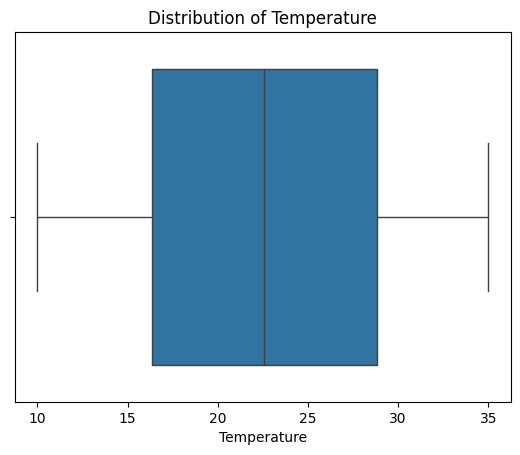

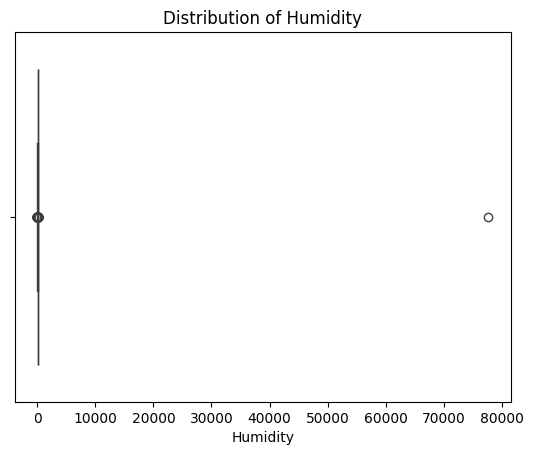

In [28]:
## Asses the numerical missing values and check for ouliers

null_missing_num_cols = ['Temperature','Humidity']

for col in null_missing_num_cols:
    sns.boxplot(data = df, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

In [29]:
## It seems like Humidity has a values that are extremely high than expected ranges.

## Humidity
iqr = df['Humidity'].quantile(0.75) - df['Humidity'].quantile(0.25)
upper_limit_humidity = df['Humidity'].quantile(0.75) + 1.5 * iqr

In [30]:
print(df[df['Humidity'] > upper_limit_humidity].shape[0])
df[df['Humidity'] > upper_limit_humidity]

46


,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption,Year,Month,Day,Hour,Week,is_null_amenities
389,2002-05-10 16:00:00,2,1BHK,22.65,80.97,1.07,0.960000,Middle,0,Garden,0.0,67.46,2002,5,10,16,4,0
568,2002-07-09 08:00:00,3,Bungalow,12.82,84.29,2.16,1.280000,Upper Middle,0,NaN,1.0,123.95,2002,7,9,8,1,1
759,2002-09-11 00:00:00,4,3BHK,14.99,84.65,1.94,1.450000,Rich,1,Swimming Pool,0.0,297.55,2002,9,11,0,2,0
1614,2003-06-23 00:00:00,3,Bungalow,29.36,81.16,2.62,1.190000,Rich,1,Fountain,0.0,194.79,2003,6,23,0,0,0
1626,2003-06-27 00:00:00,3,2BHK,11.52,82.33,2.91,0.980000,Upper Middle,1,Jacuzzi,1.0,137.46,2003,6,27,0,4,0
2173,2003-12-26 08:00:00,4,Detached,22.21,77700.00,2.81,0.950000,Rich,0,Swimming Pool,1.0,246.77,2003,12,26,8,4,0
2488,2004-04-09 08:00:00,3,1BHK,33.79,83.47,1.77,1.370000,Middle,1,Fountain,0.0,166.48,2004,4,9,8,4,0
2584,2004-05-11 08:00:00,2,Cottage,19.09,81.25,1.63,0.870000,Middle,0,NaN,0.0,54.96,2004,5,11,8,1,1
3300,2005-01-05 00:00:00,3,Bungalow,12.38,86.01,2.56,1.370000,Upper Middle,0,NaN,1.0,126.79,2005,1,5,0,2,1
3423,2005-02-15 00:00:00,4,2BHK,10.52,82.48,2.46,0.870000,Upper Middle,1,Swimming Pool,0.0,131.73,2005,2,15,0,1,0


There are 46 rows that are greater than the maximum value in the humidity. There is specifically one row that seems like an entry that is erroneaus. This value will be imputed to the upper limit of the humidity column

In [31]:
df.loc[df['Timestamp'] == '2003-12-26 08:00:00']

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption,Year,Month,Day,Hour,Week,is_null_amenities
2173,2003-12-26 08:00:00,4,Detached,22.21,77700.0,2.81,0.95,Rich,0,Swimming Pool,1.0,246.77,2003,12,26,8,4,0


In [32]:
df.loc[2173, 'Humidity'] = upper_limit_humidity
df.loc[df['Timestamp'] == '2003-12-26 08:00:00']

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption,Year,Month,Day,Hour,Week,is_null_amenities
2173,2003-12-26 08:00:00,4,Detached,22.21,80.75,2.81,0.95,Rich,0,Swimming Pool,1.0,246.77,2003,12,26,8,4,0


<Axes: xlabel='Humidity'>

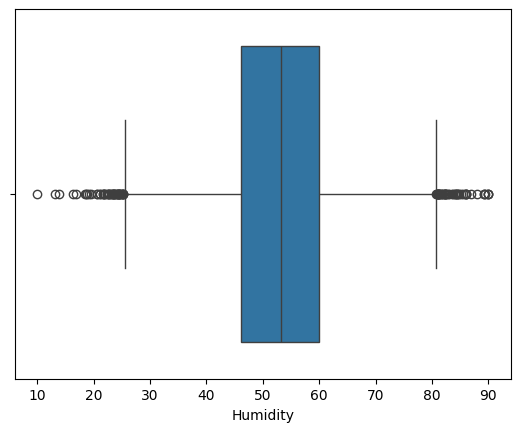

In [33]:
# Now the distribution seems valid

sns.boxplot(data = df, x = 'Humidity')

In [34]:
## Imputing the missing values with median as it has outliers

df['Humidity'] = df['Humidity'].fillna(df['Humidity'].median())

In [35]:
## Since temperature has no ouliers they are imputed with the mean
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())

In [36]:
## Imputing the Appliance_Usage column
df["Appliance_Usage"] = df["Appliance_Usage"].fillna(-1)

In [37]:
## Diving the data set for values of amenities
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
df_encoded = pd.get_dummies(df.drop(columns=["Amenities", 'Timestamp']), drop_first=True)

le = LabelEncoder()
X_train = df_encoded[df_encoded['is_null_amenities'] == 0]
X_test = df_encoded[df_encoded['is_null_amenities'] == 1]
y_train = le.fit_transform(df[df['is_null_amenities'] == 0]['Amenities'])

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

df.loc[df['is_null_amenities']==1, "Amenities"] = le.inverse_transform(rf.predict(X_test))


In [38]:
df['Amenities'].unique()

array(['Swimming Pool', 'Garden', 'Fountain', 'Jacuzzi'], dtype=object)

The Amenities column is imputed by Random Forest Classifier

In [24]:
df.isnull().sum()

Timestamp                   0
Residents                   0
Apartment_Type              0
Temperature                 0
Humidity                    0
Water_Price                 0
Period_Consumption_Index    0
Income_Level                0
Guests                      0
Amenities                   0
Appliance_Usage             0
Water_Consumption           0
Year                        0
Month                       0
Day                         0
Hour                        0
is_null_amenities           0
dtype: int64

## Handling Outliers

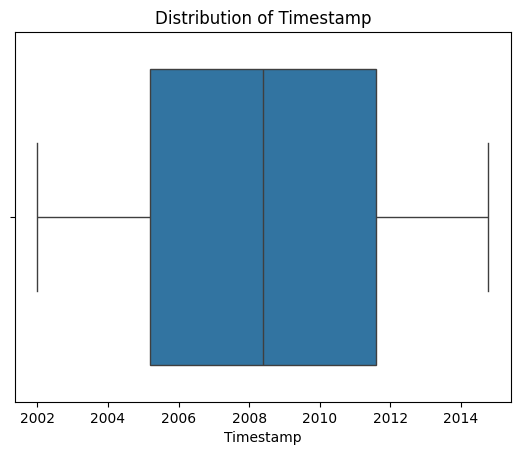

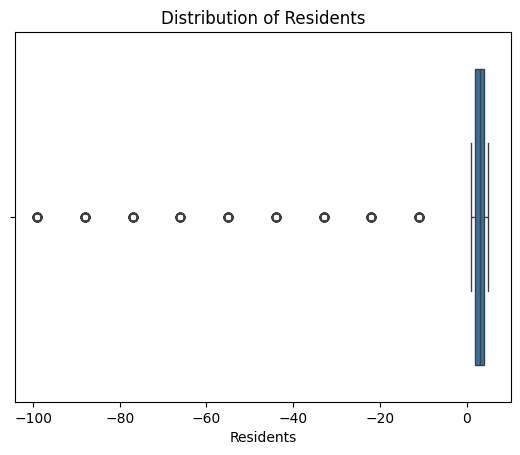

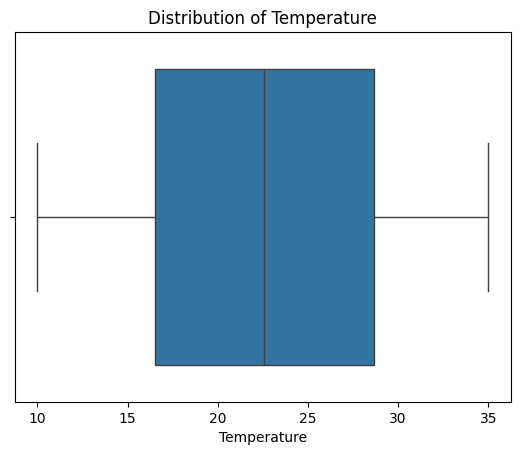

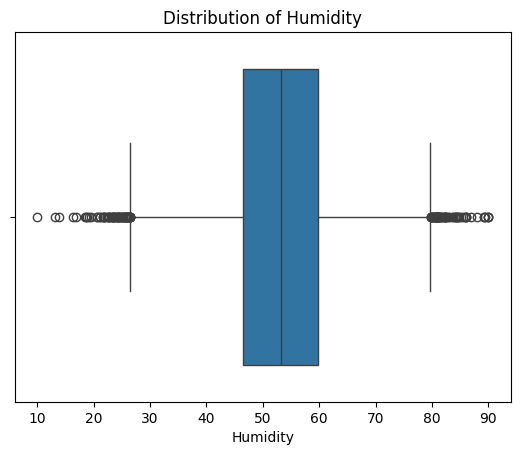

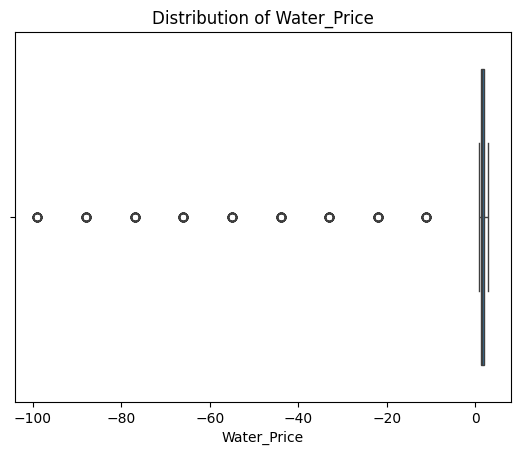

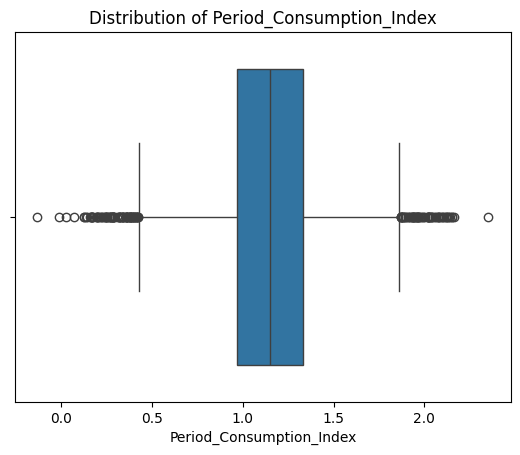

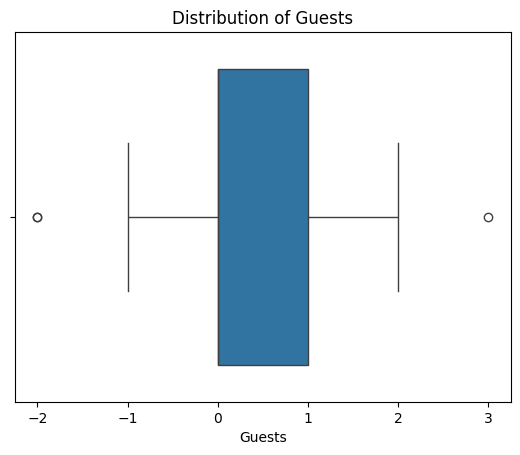

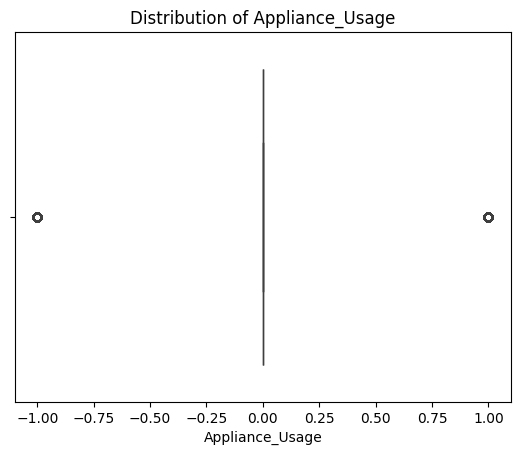

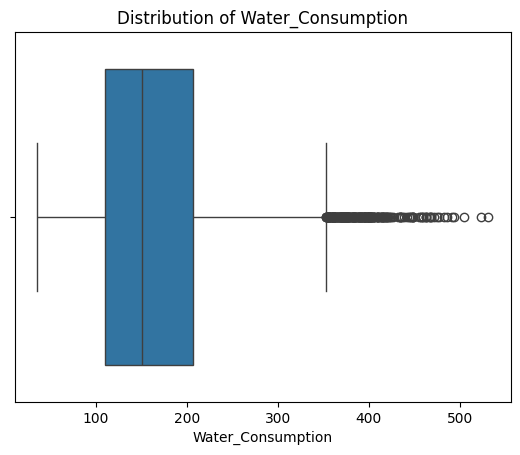

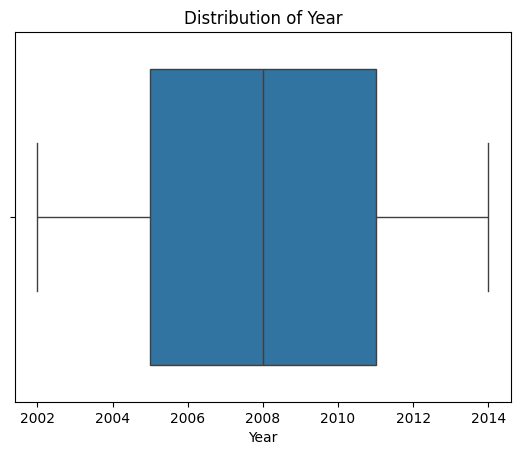

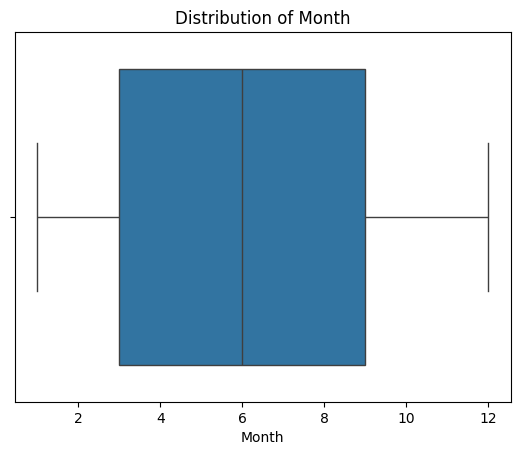

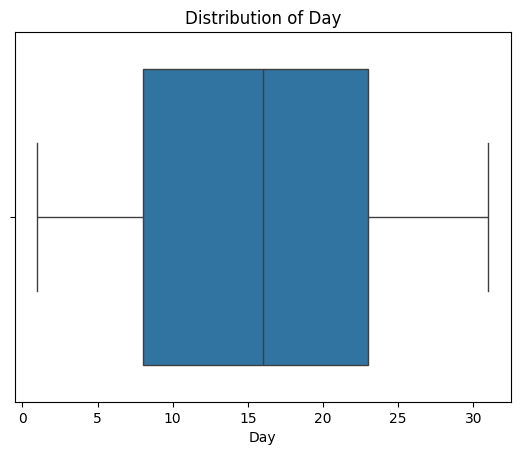

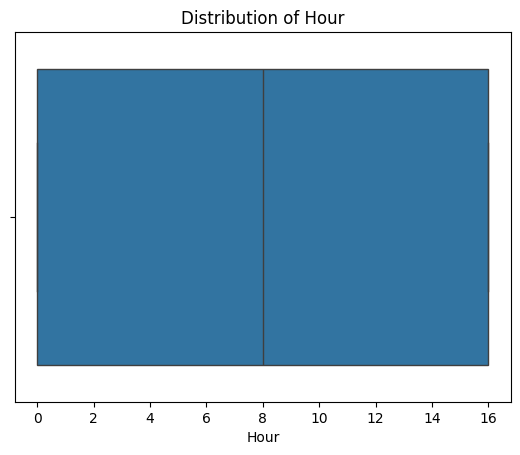

In [25]:
for col in num_cols:
    sns.boxplot(data = df, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

In [26]:
for col in num_cols:
    if col not in ['Water_Consumption','Appliance_Usage','Guests']:
        q3 = df[col].quantile(0.75)
        q1 = df[col].quantile(0.25)
        iqr = q3 - q1
        upper_bound = q3 + 1.5*iqr
        lower_bound = q1 - 1.5*iqr

        df[col] = df[col].clip(lower_bound,upper_bound)

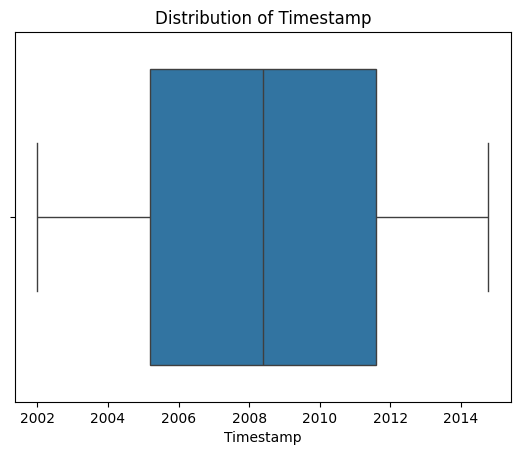

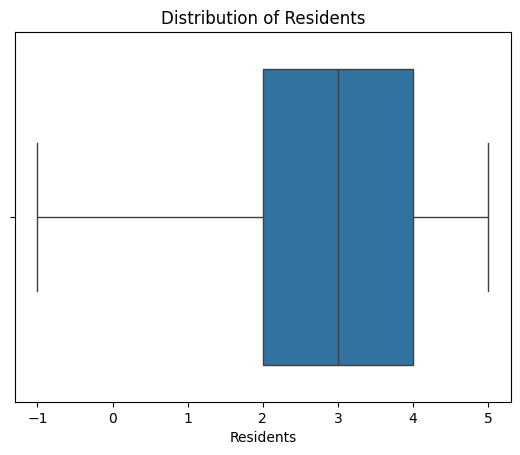

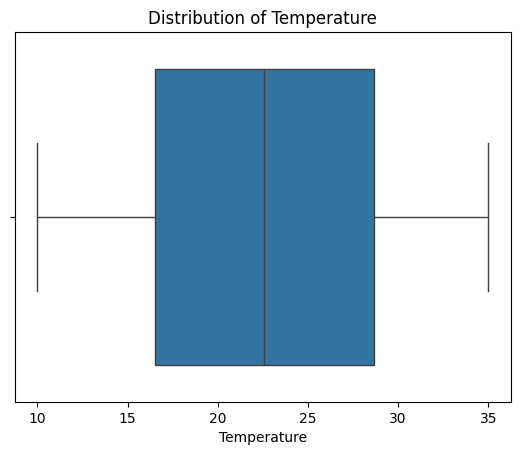

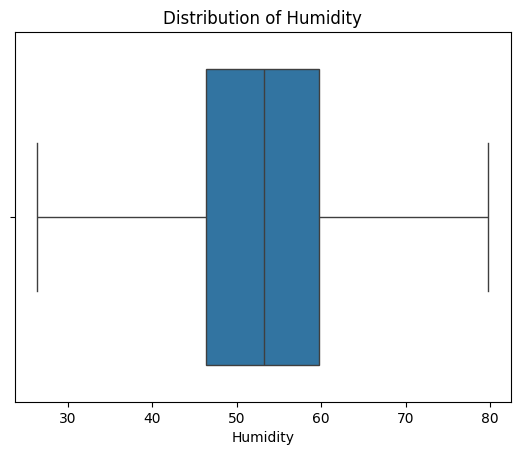

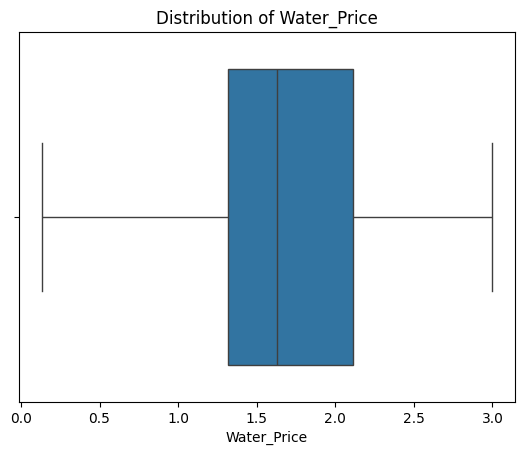

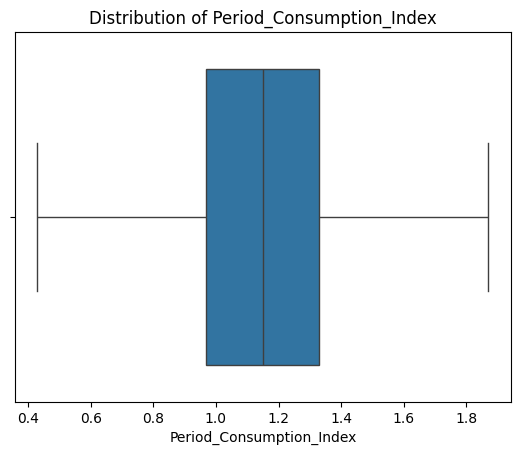

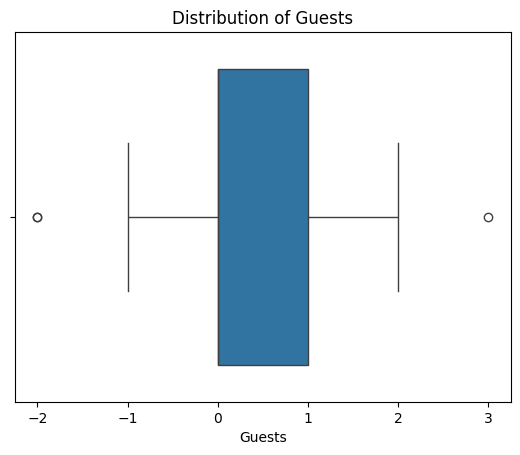

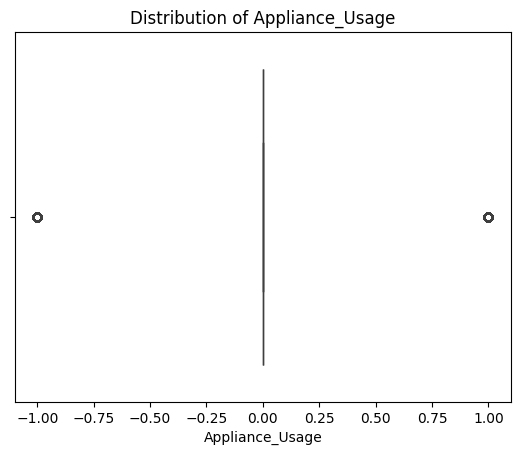

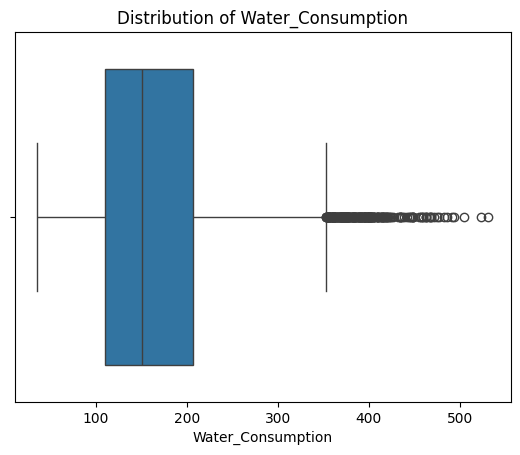

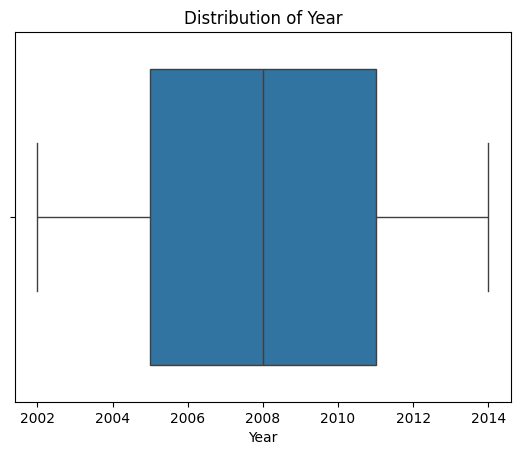

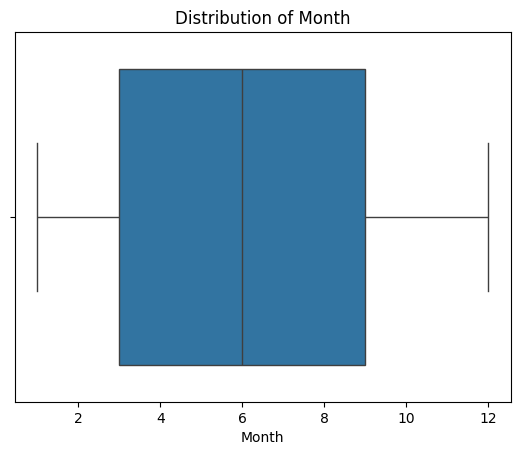

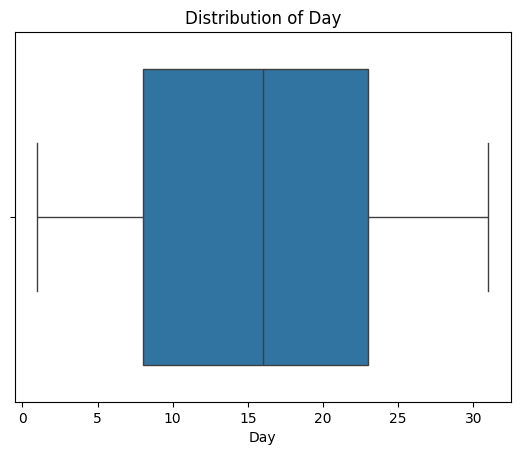

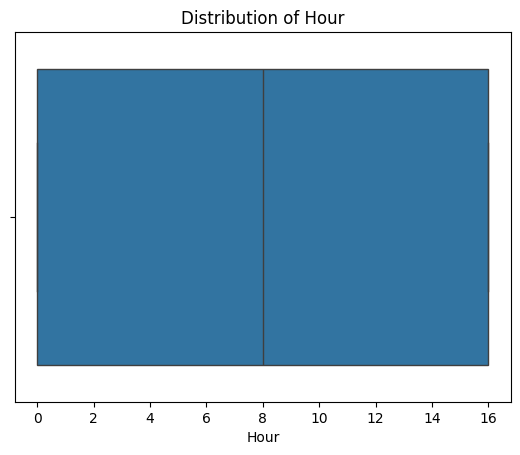

In [27]:
for col in num_cols:
    sns.boxplot(data = df, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

In [28]:
## Guests have values less than 0. Let's Examine

df[df['Guests'] < 0]['Guests'].value_counts()

## There are 2 rows where guests is -2. Let's change it to -1 for unknown
df.loc[df['Guests']<-1, 'Guests'] = -1

In [29]:
df[df['Guests'] < 0]['Guests'].value_counts()


Guests
-1    153
Name: count, dtype: int64

In [30]:
# encoding the categorical variables
df_encoded = pd.get_dummies(df, drop_first=True, dtype=int)
df_encoded = df_encoded.drop(columns='Timestamp')
df_encoded

,Residents,Temperature,Humidity,Water_Price,Period_Consumption_Index,Guests,Appliance_Usage,Water_Consumption,Year,Month,...,Apartment_Type_Detached,Apartment_Type_Studio,Apartment_Type_Unknown,Income_Level_Middle,Income_Level_Rich,Income_Level_Unknown,Income_Level_Upper Middle,Amenities_Garden,Amenities_Jacuzzi,Amenities_Swimming Pool
0,1,15.310000,46.61,1.06,0.97,0,0.0,64.85,2002,1,...,0,1,0,0,0,0,0,0,0,1
1,4,21.010000,66.11,2.98,0.91,1,1.0,192.50,2002,1,...,0,0,1,0,0,0,1,0,0,1
2,2,12.860000,60.86,1.44,1.43,0,1.0,116.62,2002,1,...,0,0,0,1,0,0,0,1,0,0
3,2,20.160000,50.58,1.48,0.91,-1,0.0,76.96,2002,1,...,0,0,0,1,0,0,0,1,0,0
4,2,16.230000,52.25,1.14,1.11,0,0.0,104.70,2002,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,2,25.610000,61.50,1.70,0.94,0,0.0,78.59,2014,10,...,0,0,0,0,0,0,0,1,0,0
13996,5,13.270000,52.58,1.88,1.03,0,1.0,185.50,2014,10,...,0,0,0,0,0,0,1,1,0,0
13997,4,22.566559,46.93,1.22,1.10,0,1.0,180.28,2014,10,...,0,0,0,1,0,0,0,1,0,0
13998,4,11.620000,64.48,2.86,1.12,1,0.0,212.19,2014,10,...,0,0,0,0,0,0,1,0,0,1


## Understanding the feature importances

In [31]:
## Checking for multi-colinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_encoded.drop(columns='Water_Consumption')
y = df_encoded['Water_Consumption']

vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by = 'VIF', ascending=False)

,Features,VIF
7,Year,122.031912
2,Humidity,30.753495
4,Period_Consumption_Index,27.781269
3,Water_Price,19.573489
0,Residents,13.277775
1,Temperature,11.572006
22,Income_Level_Upper Middle,9.400181
19,Income_Level_Middle,6.888101
23,Amenities_Garden,5.961993
20,Income_Level_Rich,5.425718


There are some features that have greater values of VIF. Lets do correlation analysis

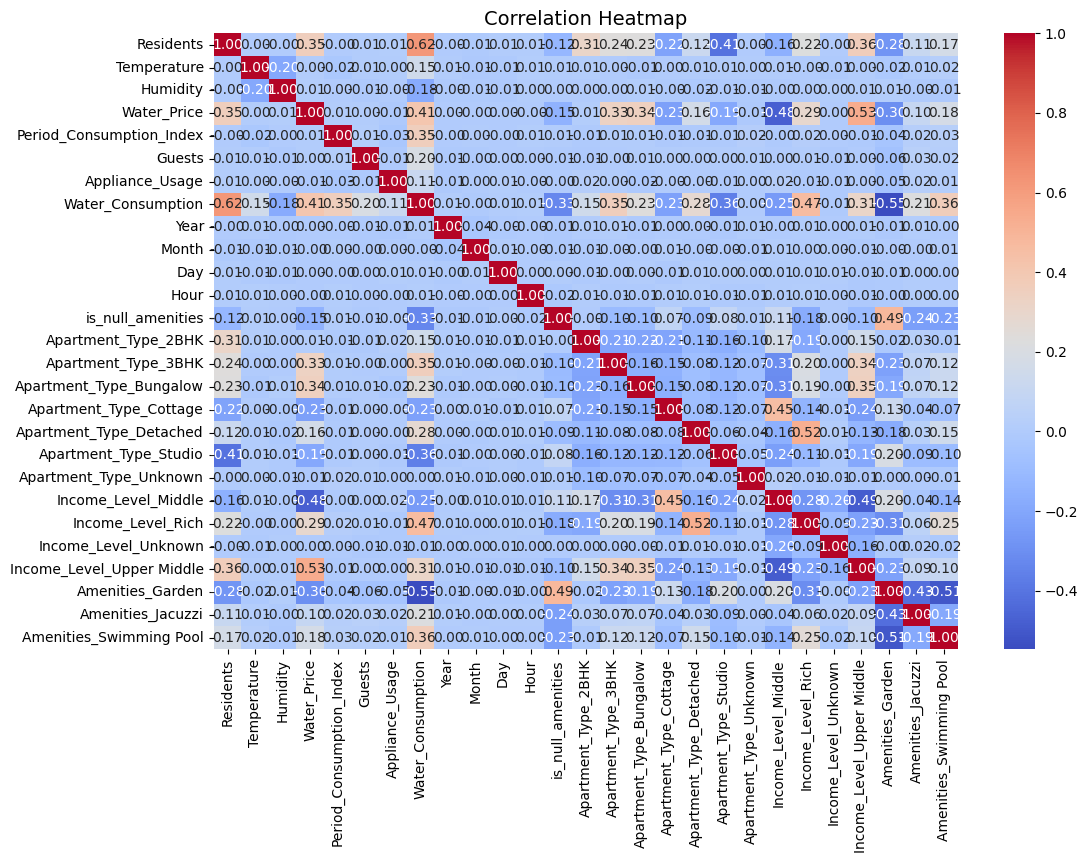

In [32]:
## Correlation Analysis

corr_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [33]:
## search for highly correlated columns
# Set a correlation threshold
threshold = 0.85

# Iterate through the correlation matrix to identify highly correlated columns
high_corr = []
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if col not in  ['Water_Consumption'] and idx not in  ['Water_consumption']:
            if col != idx and abs(corr_matrix.loc[col, idx]) >= threshold:
                high_corr.append((col, idx))

# Display the highly correlated pairs
high_corr = list(set(tuple(sorted(pair)) for pair in high_corr))
high_corr

[]

None of the columns are Highly correlated

In [34]:
import statsmodels.api as sm

X = df_encoded.drop(columns='Water_Consumption')
y = df_encoded['Water_Consumption']

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Water_Consumption   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     3439.
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:25:18   Log-Likelihood:                -65898.
No. Observations:               14000   AIC:                         1.318e+05
Df Residuals:                   13973   BIC:                         1.321e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -23.4127    123.615     -0.189      0.850    -265.714     218.889
Residents                    17.0764      0.243     70.314      0.000      16.600      17.552
Temperature                   1.2830      0.033     39.369      0.000       1.219       1.347
Humidity                     -1.1175      0.023    -48.071      0.000      -1.163      -1.072
Water_Price                  -4.9944      0.550     -9.084      0.000      -6.072      -3.917
Period_Consumption_Index    113.3556      1.017    111.452      0.000     111.362     115.349
Guests                       26.0908      0.465     56.068      0.000      25.179      27.003
Appliance_Usage              18.0077      0.511     35.247      0.000      17.006      19.009
Year                          0.0031      0.062      0.050      0.960      -0.118       0.124
Month                        -0.0337      0.066     -0.508      0.612      -0.164       0.096
Day                           0.0151      0.026      0.586      0.558      -0.035       0.066
Hour                         -0.0132      0.035     -0.379      0.705      -0.081       0.055
is_null_amenities           -16.8759      0.526    -32.099      0.000     -17.906     -15.845
Apartment_Type_2BHK          28.9804      0.897     32.293      0.000      27.221      30.739
Apartment_Type_3BHK          49.7850      1.224     40.668      0.000      47.385      52.185
Apartment_Type_Bungalow      29.5474      1.220     24.212      0.000      27.155      31.940
Apartment_Type_Cottage        0.5769      0.868      0.664      0.507      -1.125       2.279
Apartment_Type_Detached      51.1704      1.737     29.452      0.000      47.765      54.576
Apartment_Type_Studio       -12.6198      1.104    -11.435      0.000     -14.783     -10.456
Apartment_Type_Unknown       17.2545      1.441     11.972      0.000      14.429      20.080
Income_Level_Middle          10.5819      0.965     10.970      0.000       8.691      12.473
Income_Level_Rich            61.0242      1.565     38.993      0.000      57.957      64.092
Income_Level_Unknown         17.6263      1.292     13.644      0.000      15.094      20.159
Income_Level_Upper Middle    22.0062      1.306     16.856      0.000      19.447      24.565
Amenities_Garden            -15.9901      0.755    -21.187      0.000     -17.469     -14.511
Amenities_Jacuzzi             9.6136      0.860     11.181      0.000       7.928      11.299
Amenities_Swimming Pool      15.9564      0.801     19.912      0.000      14.386      17.527
==============================================================================
Omnibus:                     3504.475   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17460.014
Skew:                     

As per the VIF, correlation matrix and OLS, the columns 'Year', 'Month','Day','Hour', 'Residents', 'Temperature','Humidity','Water_Price','Apartment_Type_Cottage','Period_Consumption_Index' do not have any significance in predicting the output. But let's retain temperature and remove humidity as they can be correlated, also lets retain water_price ,Period_Consumption_Index and residents as sometimes they can act as the deciding factor

Also performing cyclical transformation on date variables lets check for correlation again

In [35]:
from sklearn.preprocessing import MinMaxScaler
# Hour (cyclical transformation)
df_encoded['Hour_sin'] = np.sin(2 * np.pi * df_encoded['Hour'] / 24)
df_encoded['Hour_cos'] = np.cos(2 * np.pi * df_encoded['Hour'] / 24)

# Month (cyclical transformation)
df_encoded['Month_sin'] = np.sin(2 * np.pi * df_encoded['Month'] / 12)
df_encoded['Month_cos'] = np.cos(2 * np.pi * df_encoded['Month'] / 12)

# Day (cyclical transformation) - assuming max days = 31
df_encoded['Day_sin'] = np.sin(2 * np.pi * df_encoded['Day'] / 31)
df_encoded['Day_cos'] = np.cos(2 * np.pi * df_encoded['Day'] / 31)

min_max_scaler = MinMaxScaler()
df_encoded['Year'] = min_max_scaler.fit_transform(df_encoded[['Year']])

# Drop the original time-related columns
df_encoded = df_encoded.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Apartment_Type_Cottage','Humidity',])
df_encoded

,Residents,Temperature,Water_Price,Period_Consumption_Index,Guests,Appliance_Usage,Water_Consumption,is_null_amenities,Apartment_Type_2BHK,Apartment_Type_3BHK,...,Income_Level_Upper Middle,Amenities_Garden,Amenities_Jacuzzi,Amenities_Swimming Pool,Hour_sin,Hour_cos,Month_sin,Month_cos,Day_sin,Day_cos
0,1,15.310000,1.06,0.97,0,0.0,64.85,0,0,0,...,0,0,0,1,0.000000,1.0,0.500000,0.866025,0.201299,0.979530
1,4,21.010000,2.98,0.91,1,1.0,192.50,0,0,0,...,1,0,0,1,0.866025,-0.5,0.500000,0.866025,0.201299,0.979530
2,2,12.860000,1.44,1.43,0,1.0,116.62,1,0,0,...,0,1,0,0,-0.866025,-0.5,0.500000,0.866025,0.201299,0.979530
3,2,20.160000,1.48,0.91,-1,0.0,76.96,0,0,0,...,0,1,0,0,0.000000,1.0,0.500000,0.866025,0.394356,0.918958
4,2,16.230000,1.14,1.11,0,0.0,104.70,0,0,0,...,0,0,0,0,0.866025,-0.5,0.500000,0.866025,0.394356,0.918958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,2,25.610000,1.70,0.94,0,0.0,78.59,1,0,0,...,0,1,0,0,0.000000,1.0,-0.866025,0.500000,0.897805,-0.440394
13996,5,13.270000,1.88,1.03,0,1.0,185.50,0,1,0,...,1,1,0,0,0.866025,-0.5,-0.866025,0.500000,0.897805,-0.440394
13997,4,22.566559,1.22,1.10,0,1.0,180.28,1,1,0,...,0,1,0,0,-0.866025,-0.5,-0.866025,0.500000,0.897805,-0.440394
13998,4,11.620000,2.86,1.12,1,0.0,212.19,0,0,1,...,1,0,0,1,0.000000,1.0,-0.866025,0.500000,0.790776,-0.612106


## Re-analyze the correlation and variance inflation

In [36]:
X = df_encoded.drop(columns='Water_Consumption')
y = df_encoded['Water_Consumption']
vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by = 'VIF', ascending=False)

,Features,VIF
3,Period_Consumption_Index,17.565006
2,Water_Price,16.672286
0,Residents,12.115908
1,Temperature,9.602344
16,Income_Level_Upper Middle,8.592994
17,Amenities_Garden,5.322165
14,Income_Level_Rich,5.097303
13,Income_Level_Middle,5.027966
8,Apartment_Type_3BHK,3.583807
9,Apartment_Type_Bungalow,3.583377


Only period consumption index, water price and residents have high VIF

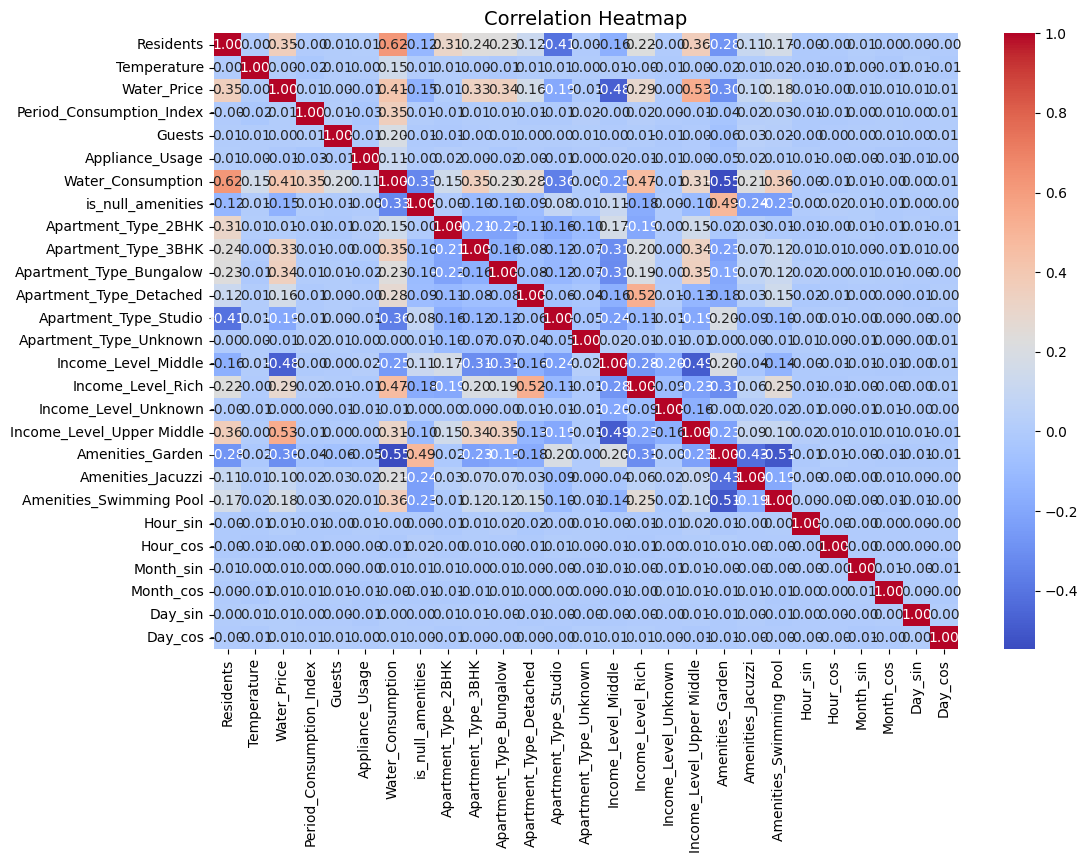

In [37]:
## Correlation Analysis

corr_matrix = df_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [38]:
## search for highly correlated columns
# Set a correlation threshold
threshold = 0.85

# Iterate through the correlation matrix to identify highly correlated columns
high_corr = []
for col in corr_matrix.columns:
    for idx in corr_matrix.index:
        if col not in  ['Water_Consumption'] and idx not in  ['Water_consumption']:
            if col != idx and abs(corr_matrix.loc[col, idx]) >= threshold:
                high_corr.append((col, idx))

# Display the highly correlated pairs
high_corr = list(set(tuple(sorted(pair)) for pair in high_corr))
high_corr

[]

Again, none of the column are highly correlated

In [39]:
## Feature importance through OLS

X = sm.add_constant(X)
y = df_encoded['Water_Consumption']
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Water_Consumption   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2875.
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        00:25:36   Log-Likelihood:                -66969.
No. Observations:               14000   AIC:                         1.340e+05
Df Residuals:                   13973   BIC:                         1.342e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -83.4291      2.150    -38.811      0.000     -87.643     -79.215
Residents                    17.1241      0.262     65.327      0.000      16.610      17.638
Temperature                   1.5892      0.035     46.063      0.000       1.522       1.657
Water_Price                  -5.3089      0.593     -8.946      0.000      -6.472      -4.146
Period_Consumption_Index    113.5281      1.098    103.404      0.000     111.376     115.680
Guests                       26.3714      0.502     52.500      0.000      25.387      27.356
Appliance_Usage              18.0099      0.552     32.653      0.000      16.929      19.091
is_null_amenities           -16.8799      0.568    -29.744      0.000     -17.992     -15.768
Apartment_Type_2BHK          28.8779      0.868     33.259      0.000      27.176      30.580
Apartment_Type_3BHK          50.0735      1.257     39.824      0.000      47.609      52.538
Apartment_Type_Bungalow      29.6651      1.253     23.677      0.000      27.209      32.121
Apartment_Type_Detached      52.5861      1.832     28.706      0.000      48.995      56.177
Apartment_Type_Studio       -12.4841      1.190    -10.490      0.000     -14.817     -10.151
Apartment_Type_Unknown       17.6511      1.512     11.673      0.000      14.687      20.615
Income_Level_Middle          10.6177      0.954     11.124      0.000       8.747      12.489
Income_Level_Rich            60.2112      1.650     36.483      0.000      56.976      63.446
Income_Level_Unknown         17.3062      1.360     12.728      0.000      14.641      19.971
Income_Level_Upper Middle    21.7111      1.360     15.960      0.000      19.045      24.378
Amenities_Garden            -16.0421      0.815    -19.682      0.000     -17.640     -14.444
Amenities_Jacuzzi             9.7747      0.928     10.529      0.000       7.955      11.594
Amenities_Swimming Pool      16.2805      0.865     18.815      0.000      14.584      17.977
Hour_sin                      0.4437      0.346      1.281      0.200      -0.235       1.122
Hour_cos                      0.0120      0.346      0.035      0.972      -0.667       0.691
Month_sin                    -0.1369      0.346     -0.396      0.692      -0.814       0.540
Month_cos                    -0.3403      0.347     -0.981      0.327      -1.021       0.340
Day_sin                       0.1398      0.343      0.408      0.684      -0.533       0.812
Day_cos                       0.0701      0.350      0.201      0.841      -0.615       0.755
==============================================================================
Omnibus:                     3048.814   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13264.243
Skew:                     

Even now, the cyclical features of date parts have high p values, so let's analyze any other complex relationship between features through Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf_feat_imp = RandomForestRegressor(n_estimators=100, random_state=42)

X = df_encoded.drop(columns='Water_Consumption')
y = df_encoded['Water_Consumption']

rf_feat_imp.fit(X, y)

feature_importances = pd.DataFrame(
    data=rf_feat_imp.feature_importances_, 
    columns=['Importance'], 
    index=X.columns
).sort_values(by='Importance', ascending=False)

feature_importances

,Importance
Residents,0.444975
Period_Consumption_Index,0.169166
Amenities_Garden,0.135664
Income_Level_Rich,0.053255
Temperature,0.040956
Guests,0.034274
Water_Price,0.026183
is_null_amenities,0.019143
Appliance_Usage,0.013210
Day_sin,0.008415


The cyclical features seems to have very less feature importances. Let's check if they have any relationship with the water consumption

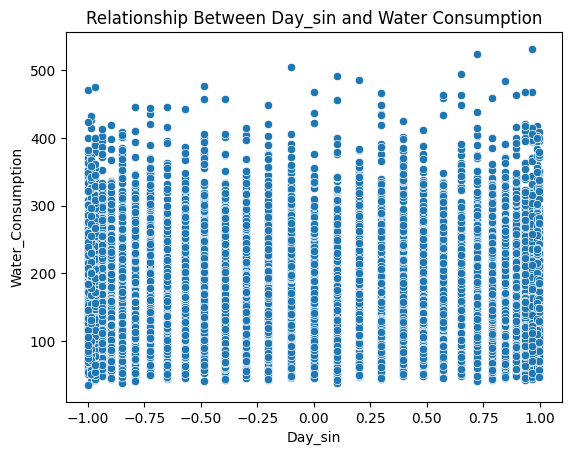

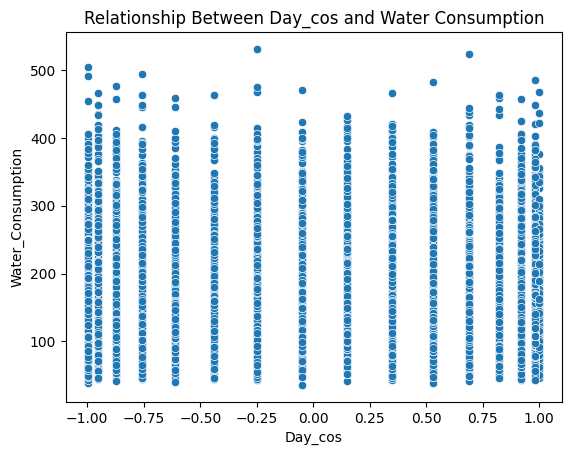

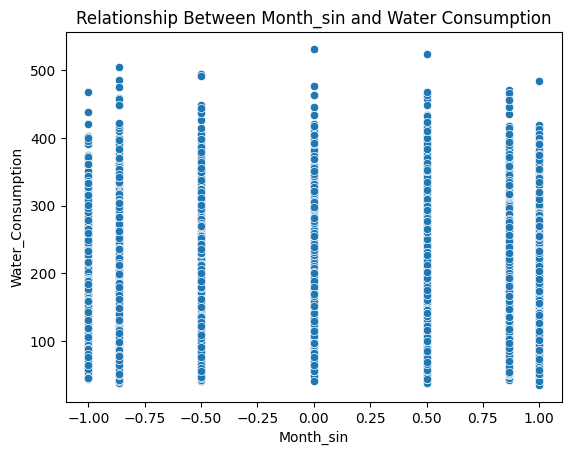

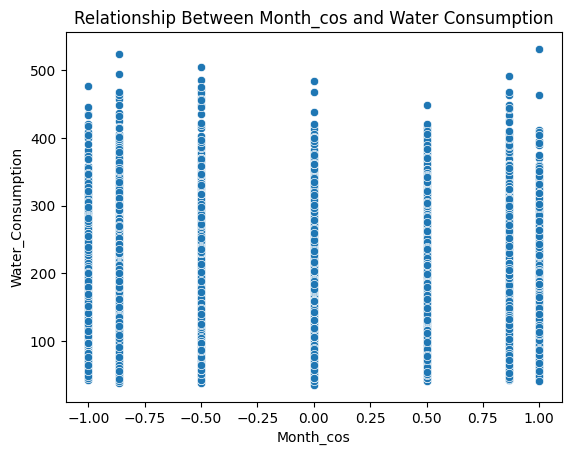

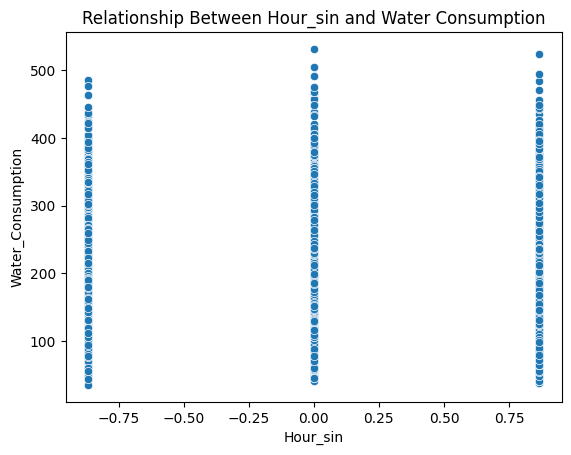

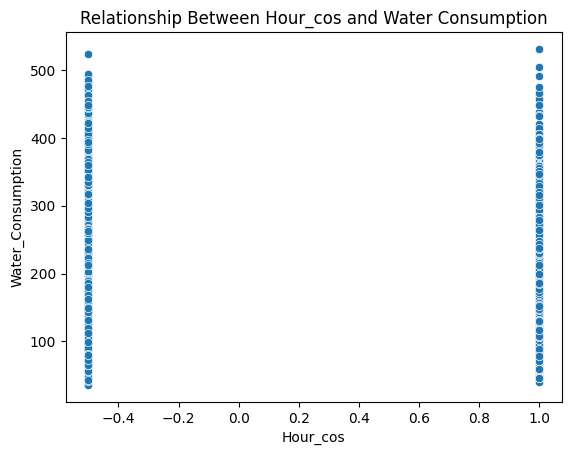

In [41]:
cyclical_features = ['Day_sin', 'Day_cos', 'Month_sin', 'Month_cos', 'Hour_sin', 'Hour_cos']
for col in cyclical_features:
    sns.scatterplot(data=df_encoded, x = col, y='Water_Consumption')
    plt.title(f"Relationship Between {col} and Water Consumption")
    plt.show()

There seems to be little to very less relationship between cyclical features and predictor variable, there for they can be dropped

In [42]:
df_encoded = df_encoded.drop(columns=['Day_sin', 'Day_cos', 'Month_sin', 'Month_cos', 'Hour_sin', 'Hour_cos'])
df_encoded

,Residents,Temperature,Water_Price,Period_Consumption_Index,Guests,Appliance_Usage,Water_Consumption,is_null_amenities,Apartment_Type_2BHK,Apartment_Type_3BHK,...,Apartment_Type_Detached,Apartment_Type_Studio,Apartment_Type_Unknown,Income_Level_Middle,Income_Level_Rich,Income_Level_Unknown,Income_Level_Upper Middle,Amenities_Garden,Amenities_Jacuzzi,Amenities_Swimming Pool
0,1,15.310000,1.06,0.97,0,0.0,64.85,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,4,21.010000,2.98,0.91,1,1.0,192.50,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,2,12.860000,1.44,1.43,0,1.0,116.62,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,2,20.160000,1.48,0.91,-1,0.0,76.96,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,2,16.230000,1.14,1.11,0,0.0,104.70,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,2,25.610000,1.70,0.94,0,0.0,78.59,1,0,0,...,0,0,0,0,0,0,0,1,0,0
13996,5,13.270000,1.88,1.03,0,1.0,185.50,0,1,0,...,0,0,0,0,0,0,1,1,0,0
13997,4,22.566559,1.22,1.10,0,1.0,180.28,1,1,0,...,0,0,0,1,0,0,0,1,0,0
13998,4,11.620000,2.86,1.12,1,0.0,212.19,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [43]:
df_encoded.columns

Index(['Residents', 'Temperature', 'Water_Price', 'Period_Consumption_Index',
       'Guests', 'Appliance_Usage', 'Water_Consumption', 'is_null_amenities',
       'Apartment_Type_2BHK', 'Apartment_Type_3BHK', 'Apartment_Type_Bungalow',
       'Apartment_Type_Detached', 'Apartment_Type_Studio',
       'Apartment_Type_Unknown', 'Income_Level_Middle', 'Income_Level_Rich',
       'Income_Level_Unknown', 'Income_Level_Upper Middle', 'Amenities_Garden',
       'Amenities_Jacuzzi', 'Amenities_Swimming Pool'],
      dtype='object')

## Model Training

In [44]:
## split the dataset df_encoded for evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop(columns='Water_Consumption')
y = df_encoded['Water_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11200, 20), (2800, 20), (11200,), (2800,))

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dictionary of Models
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "XGBRegressor": XGBRegressor(objective='reg:squarederror'),
    "AdaBoost Regressor": AdaBoostRegressor(),
}

# Hyperparameter Grid (without MultiOutputRegressor)
params = {
    "Decision Tree": {
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'splitter': ['best', 'random'],
        'max_features': ['sqrt', 'log2']
    },
    "Random Forest": {
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'max_features': ['sqrt', 'log2', None],
        'n_estimators': [32, 64, 128, 256]
    },
    "Gradient Boosting": {
        'loss': ['squared_error', 'huber', 'absolute_error', 'quantile'],
        'learning_rate': [0.1, 0.01, 0.05, 0.001],
        'subsample': [0.7, 0.75, 0.8, 0.85, 0.9],
        'criterion': ['squared_error', 'friedman_mse'],
        'max_features': [1.0, 'sqrt', 'log2'],
        'n_estimators': [32, 64, 128, 256]
    },
    "Linear Regression": {},
    "SVR": {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto']
    },
    "XGBRegressor": {
        'learning_rate': [0.1, 0.01, 0.05, 0.001],
        'n_estimators': [32, 64, 128, 256]
    }
    ,
    "AdaBoost Regressor": {
        'learning_rate': [0.1, 0.01, 0.5, 0.001],
        'loss': ['linear', 'square', 'exponential'],
        'n_estimators': [32, 64, 128, 256]
    }
}


In [61]:
## model training

def evaluate_model(X_train, X_test, y_train, y_test, models, params):
    train_report = dict()
    test_report = dict()
    for i in range(len(models)):
        model = list(models.values())[i]
        param = params[list(models.keys())[i]]

        gs = GridSearchCV(model, param, cv=3, n_jobs=-1)
        gs.fit(X_train, y_train)

        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_model_score = []
        test_model_score = []

        #train model scores
        rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        mae = mean_absolute_error(y_train, y_train_pred)
        r2 = r2_score(y_train, y_train_pred)

        train_model_score.extend([rmse, mae, r2])
        train_report[list(models.keys())[i]] = train_model_score

        #test model scores
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        mae_test = mean_absolute_error(y_test, y_test_pred)
        r2_test = r2_score(y_test, y_test_pred)
            
        test_model_score.extend([rmse_test, mae_test, r2_test])

        test_report[list(models.keys())[i]] = test_model_score
        
        train_report_df = pd.DataFrame.from_dict(train_report, orient = 'index', columns = ["RMSE", "MAE", "R²"])
        test_report_df = pd.DataFrame.from_dict(test_report, orient = 'index', columns = ["RMSE", "MAE", "R²"])

    return train_report_df, test_report_df
    


In [62]:
train_report, test_report = evaluate_model(X_train, X_test, y_train, y_test, models, params)

In [65]:
print(train_report)
print("-----------------------")
print(test_report)

                         RMSE        MAE        R²
Decision Tree        0.000000   0.000000  1.000000
Random Forest        7.579810   5.093859  0.989033
Gradient Boosting   14.700035  10.587358  0.958753
Linear Regression   28.701901  20.023920  0.842753
SVR                 15.444043   9.213463  0.954472
XGBRegressor         9.725921   7.188419  0.981944
AdaBoost Regressor  34.992219  28.201788  0.766276
-----------------------
                         RMSE        MAE        R²
Decision Tree       33.312967  22.978032  0.801618
Random Forest       20.189076  13.853555  0.927137
Gradient Boosting   16.179598  11.354946  0.953204
Linear Regression   29.843733  20.433650  0.840786
SVR                 17.847493  11.851283  0.943058
XGBRegressor        16.270195  11.320351  0.952678
AdaBoost Regressor  35.835458  28.767023  0.770437


DecisionTreeRegressor()